https://lmfit.github.io/lmfit-py/examples/example_Model_interface.html

In [1]:
import numpy as np
from pandas import Series

from lmfit import Model, Parameter, report_fit

In [2]:
def decay(t, N, tau):
    return N*np.exp(-t/tau)

In [3]:
t = np.linspace(0, 5, num=1000)
data = decay(t, 7, 3) + np.random.randn(t.size)

In [4]:
model = Model(decay, independent_vars=['t'])
result = model.fit(data, t=t, N=10, tau=1)

In [5]:
print(result.values)

{'N': 7.048809620265173, 'tau': 2.9905875268370816}


In [6]:
result.params

name,value,standard error,relative error,initial value,min,max,vary
N,7.04880962,0.09010968,(1.28%),10,-inf,inf,True
tau,2.99058753,0.06594361,(2.21%),1,-inf,inf,True


In [15]:
result.params['N']

<Parameter 'N', value=7.048809620265173 +/- 0.0901, bounds=[-inf:inf]>

In [16]:
result.params['N'].stderr

0.09010968337769082

In [18]:
result.params['N'].value

7.048809620265173

# Bragg Edge fitting


In [14]:
import numpy as np
from scipy import special
from lmfit import Model, Parameter
import matplotlib.pyplot as plt
%matplotlib notebook

In [65]:
xaxis = np.array([0.00511936, 0.0051296 , 0.00513984, 0.00515008, 0.00516032,
       0.00517056, 0.0051808 , 0.00519104, 0.00520128, 0.00521152,
       0.00522176, 0.005232  , 0.00524224, 0.00525248, 0.00526272,
       0.00527296, 0.0052832 , 0.00529344, 0.00530368, 0.00531392,
       0.00532416, 0.0053344 , 0.00534464, 0.00535488, 0.00536512,
       0.00537536, 0.0053856 , 0.00539584, 0.00540608, 0.00541632,
       0.00542656, 0.0054368 , 0.00544704, 0.00545728, 0.00546752,
       0.00547776, 0.005488  , 0.00549824, 0.00550848, 0.00551872,
       0.00552896, 0.0055392 , 0.00554944, 0.00555968, 0.00556992,
       0.00558016, 0.0055904 , 0.00560064, 0.00561088, 0.00562112,
       0.00563136, 0.0056416 , 0.00565184, 0.00566208, 0.00567232,
       0.00568256, 0.0056928 , 0.00570304, 0.00571328, 0.00572352,
       0.00573376, 0.005744  , 0.00575424, 0.00576448, 0.00577472,
       0.00578496, 0.0057952 , 0.00580544, 0.00581568, 0.00582592,
       0.00583616, 0.0058464 , 0.00585664, 0.00586688, 0.00587712,
       0.00588736, 0.0058976 , 0.00590784, 0.00591808, 0.00592832,
       0.00593856, 0.0059488 , 0.00595904, 0.00596928, 0.00597952,
       0.00598976, 0.006     , 0.00601024, 0.00602048, 0.00603072,
       0.00604096, 0.0060512 , 0.00606144, 0.00607168, 0.00608192,
       0.00609216, 0.0061024 , 0.00611264, 0.00612288, 0.00613312,
       0.00614336, 0.0061536 , 0.00616384, 0.00617408, 0.00618432,
       0.00619456, 0.0062048 , 0.00621504, 0.00622528, 0.00623552,
       0.00624576, 0.006256  , 0.00626624, 0.00627648, 0.00628672,
       0.00629696, 0.0063072 , 0.00631744, 0.00632768, 0.00633792,
       0.00634816, 0.0063584 , 0.00636864, 0.00637888, 0.00638912,
       0.00639936, 0.0064096 , 0.00641984, 0.00643008, 0.00644032,
       0.00645056, 0.0064608 , 0.00647104])

In [66]:
yaxis = np.array([0.22635038,
 0.22615357,
 0.22665687,
 0.22573979,
 0.2254613,
 0.22619116,
 0.2260957,
 0.22544764,
 0.22534621,
 0.22488455,
 0.22488707,
 0.22556762,
 0.22421476,
 0.22450405,
 0.22440352,
 0.22420205,
 0.22300239,
 0.22296941,
 0.22291027,
 0.22337486,
 0.223185,
 0.22222532,
 0.22227073,
 0.22146992,
 0.22208498,
 0.22194636,
 0.22170071,
 0.22022441,
 0.22079921,
 0.22043908,
 0.21981141,
 0.22044104,
 0.21873342,
 0.21993119,
 0.21881172,
 0.21864027,
 0.21816084,
 0.21771753,
 0.21732977,
 0.21782923,
 0.216347,
 0.21672791,
 0.21610461,
 0.21500927,
 0.21548794,
 0.21579437,
 0.21485691,
 0.21395028,
 0.21427092,
 0.21398294,
 0.21391435,
 0.21271744,
 0.21318229,
 0.21194506,
 0.21128176,
 0.21214078,
 0.20956813,
 0.21039392,
 0.20981264,
 0.20940237,
 0.20921695,
 0.20928735,
 0.20816012,
 0.2084342,
 0.20695364,
 0.20725374,
 0.20574068,
 0.20612015,
 0.20668863,
 0.20694464,
 0.20695636,
 0.2101691,
 0.21303496,
 0.21548398,
 0.21865305,
 0.22014111,
 0.2213323,
 0.22120571,
 0.22235163,
 0.22249244,
 0.22335272,
 0.22268227,
 0.22270016,
 0.2224176,
 0.22303328,
 0.2226055,
 0.22358713,
 0.22309346,
 0.22318856,
 0.22264564,
 0.2227879,
 0.22326908,
 0.22426549,
 0.22382893,
 0.22281139,
 0.22314195,
 0.22143252,
 0.2219981,
 0.22329773,
 0.2221203,
 0.22307695,
 0.22203377,
 0.22245674,
 0.22258331,
 0.222345,
 0.22151347,
 0.22210349,
 0.22160803,
 0.22185999,
 0.22105424,
 0.22162178,
 0.22141351,
 0.22025093,
 0.22112045,
 0.22063348,
 0.2210217,
 0.21979661,
 0.22105029,
 0.220833,
 0.22142243,
 0.2210736,
 0.21991207,
 0.21946011,
 0.21989849,
 0.21909127,
 0.21973838,
 0.21927427,
 0.21925545,
 0.21891946,
 0.21874511,
 0.21925578,
 0.21865194,
 0.21962221])

In [74]:
assert len(xaxis) == len(yaxis)

In [ ]:
np.lo

<IPython.core.display.Javascript object>


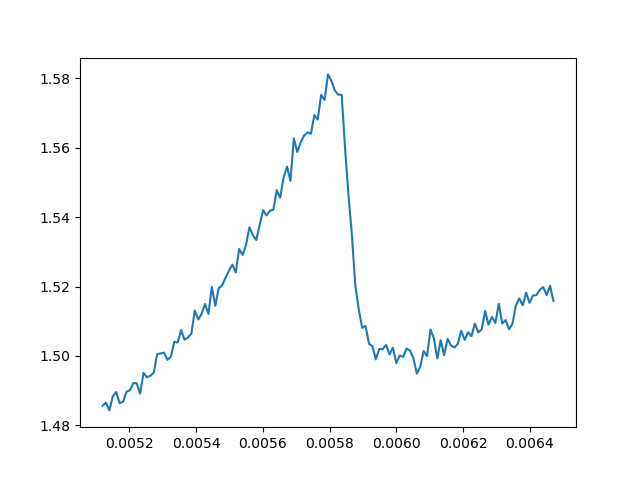

In [100]:
plt.figure()
plt.plot(xaxis, -np.log(yaxis))

In [69]:
a0 = 1.2944847351047915
b0 = 34.35233451421226
ahkl = -0.4939724218799715
bhkl = 97.83113065652672

In [71]:
def kropff_bragg_peak(tof, a0, b0, ahkl, bhkl, tofhkl, sigma, tau):
	"""Equation 4.3 and 4.4 found in Development and application of Bragg edge neutron transmission
	imaging on the IMAT beamline. Thesis by Ranggi Sahmura Ramadhan. June 2019
	:param
    tof
    a0 fix parameter
	b0 fix parameter
	ahkl fix parameter
	bhkl fix parameter
	tofhkl parameter to fit
	tau parameter to fit
	sigma parameter to fit
	"""
	def B(tofhkl, sigma, tau, tof):
		const1 = (sigma*sigma) / (2 * tau*tau)
		const2 = sigma / tau

		part1 = special.erfc(-(tof - tofhkl) / (np.sqrt(2) * sigma))
		part2 = np.exp((-(tof - tofhkl) / tau) + const1)
		part3 = special.erfc((-(tof - tofhkl)/(np.sqrt(2) * sigma)) + const2)
		return 0.5 * (part1 - part2 * part3)

	exp_expression_1 = np.exp(-(a0 + b0 * tof))
	exp_expression_2 = np.exp(-(ahkl + bhkl * tof))
	expression_3 = (1 - np.exp(-(ahkl + bhkl * tof)) * B(tofhkl, sigma, tau, tof))

	return exp_expression_1 * (exp_expression_2 + expression_3)

In [72]:
gmodel = Model(kropff_bragg_peak, nan_policy='propagate', independent_vars=['tof'])

<IPython.core.display.Javascript object>


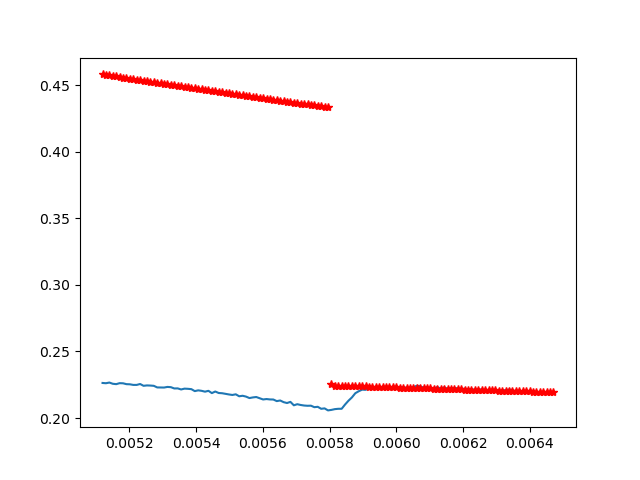

tofhkl: 0.005799827418899181
tau: 9.59663560984808e-07
sigma: 8.37673754978202e-07


In [98]:
yaxis_to_fit = yaxis
wavelength_to_fit = wavelength
tof_to_fit = tof

tofhkl = 5800e-6
sigma = 1e-6
tau = 1e-6

_result = gmodel.fit(yaxis, tof=xaxis,
                     a0=Parameter('a0', value=a0, vary=False),
                     b0=Parameter('b0', value=b0, vary=False),
                     ahkl=Parameter('ahkl', value=ahkl, vary=False),
                     bhkl=Parameter('bhkl', value=bhkl, vary=False),
                     tofhkl=tofhkl,
                     sigma=sigma,
                     tau=tau)


tofhkl = _result.params['tofhkl'].value
sigma = _result.params['sigma'].value
tau = _result.params['tau'].value

fitted_data = kropff_bragg_peak_lambda(tof=xaxis,
                                       a0=a0,
                                       b0=b0,
                                       ahkl=ahkl,
                                       bhkl=bhkl,
                                       tofhkl=tofhkl,
                                       sigma=sigma,
                                       tau=tau)

plt.figure()
plt.plot(xaxis, yaxis)
plt.plot(xaxis, fitted_data, '*r')

print(f"tofhkl: {tofhkl}")
print(f"tau: {tau}")
print(f"sigma: {sigma}")
